LEVEL_3

TASK-1 ==> Analyze the text reviews to identify the most
common positive and negative keywords.
Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('Dataset .csv')

In [3]:
sia = SentimentIntensityAnalyzer()

In [4]:
def calculate_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

In [5]:
df['sentiment'] = df['Rating text'].apply(calculate_sentiment)

In [6]:
positive_reviews = df[df['sentiment'] > 0.5]
negative_reviews = df[df['sentiment'] < -0.5]

positive_tokens = [word_tokenize(review) for review in positive_reviews['Rating text']]
negative_tokens = [word_tokenize(review) for review in negative_reviews['Rating text']]


In [7]:
stop_words = set(stopwords.words('english'))
positive_tokens = [[word for word in tokens if word not in stop_words] for tokens in positive_tokens]
negative_tokens = [[word for word in tokens if word not in stop_words] for tokens in negative_tokens]

positive_word_freq = nltk.FreqDist([word for tokens in positive_tokens for word in tokens])
negative_word_freq = nltk.FreqDist([word for tokens in negative_tokens for word in tokens])


In [8]:
positive_keywords = positive_word_freq.most_common()
negative_keywords = negative_word_freq.most_common()

print("Top Positive Keywords:")
print(positive_keywords)
print("Top Negative Keywords:")
print(negative_keywords)

Top Positive Keywords:
[('Excellent', 301)]
Top Negative Keywords:
[]


In [9]:
avg_review_length = df['Rating text'].apply(len).mean()
print("Average Review Length:", avg_review_length)

Average Review Length: 7.020730813527379


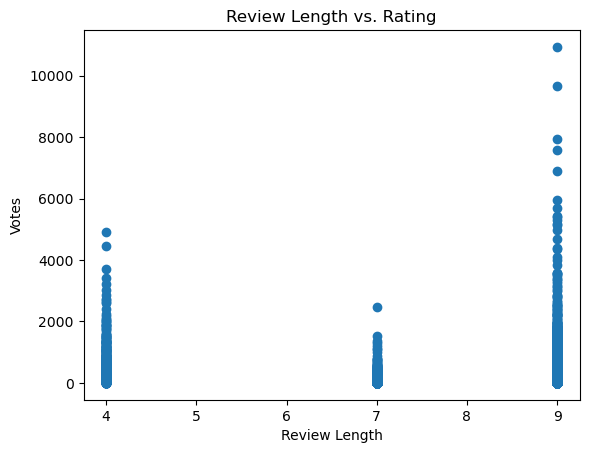

In [10]:
plt.scatter(df['Rating text'].apply(len), df['Votes'])
plt.xlabel('Review Length')
plt.ylabel('Votes')
plt.title('Review Length vs. Rating')
plt.show()

TASK-2 ==>Identify the restaurants with the highest and
lowest number of votes.
Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('Dataset .csv')

In [15]:
most_voted_restaurants = df.nlargest(10, 'Votes')
least_voted_restaurants = df.nsmallest(10, 'Votes')

In [16]:
print("Restaurants with the highest number of votes:")
print(most_voted_restaurants[['Restaurant Name', 'Votes']])
print("Restaurants with the lowest number of votes:")
print(least_voted_restaurants[['Restaurant Name', 'Votes']])

Restaurants with the highest number of votes:
                Restaurant Name  Votes
728                        Toit  10934
735                    Truffles   9667
3994           Hauz Khas Social   7931
2412                  Peter Cat   7574
739   AB's - Absolute Barbecues   6907
2414            Barbeque Nation   5966
743                 Big Brewsky   5705
2307  AB's - Absolute Barbecues   5434
736             The Black Pearl   5385
2411                      BarBQ   5288
Restaurants with the lowest number of votes:
        Restaurant Name  Votes
69     Cantinho da Gula      0
874       The Chaiwalas      0
879  Fusion Food Corner      0
880       Punjabi Rasoi      0
887       Baskin Robbin      0
900              Angaar      0
901               TcozY      0
902       The Retriever      0
905      Chill 'N Grill      0
906  Punjabi Restaurant      0


In [17]:
corr_coef = df['Votes'].corr(df['Aggregate rating'])
print("Correlation coefficient between votes and rating:", corr_coef)

Correlation coefficient between votes and rating: 0.3136905841954073


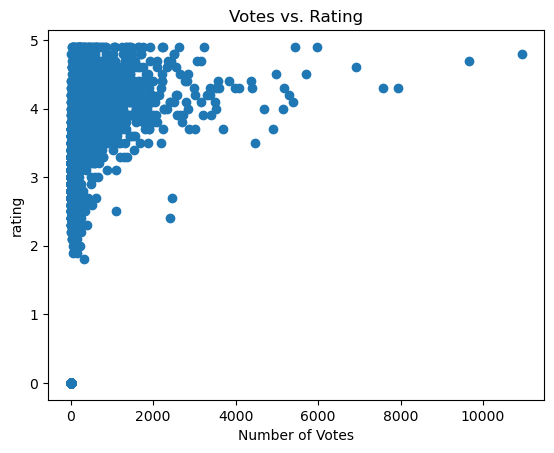

In [18]:
plt.scatter(df['Votes'], df['Aggregate rating'])
plt.xlabel('Number of Votes')
plt.ylabel('rating')
plt.title('Votes vs. Rating')
plt.show()